# Drug Test #
## Dataset : Drug200.csv ##


### Importing required libraries ###

In [57]:
import pandas as pd
import numpy as np
df = pd.read_csv('drug200.csv')


### Replacing Catergorical Values ###

In [26]:
df['Sex'].replace(['F', 'M'], [0, 1], inplace = True)
df['BP'].replace(['LOW', 'NORMAL', 'HIGH'], [0, 1, 2], inplace = True)
df['Cholesterol'].replace(['NORMAL', 'HIGH'], [0, 1], inplace = True)
df['Drug'].replace(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], [0, 1, 2, 3, 4], inplace = True)
print(df.head())

   Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    0   2            1   25.355     4
1   47    1   0            1   13.093     2
2   47    1   0            1   10.114     2
3   28    0   1            1    7.798     3
4   61    0   0            1   18.043     4


### Importing the model ###

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


#### Training the Model ####

In [48]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

In [50]:


DrugTree = DecisionTreeClassifier(  criterion="entropy", max_depth = 4)
cross_val_scores = cross_val_score(DrugTree, X, y, cv=10, scoring='accuracy')


#### Model Accuracy ####

In [51]:
print("Cross-Validation Scores for each fold:", cross_val_scores)
print(f"Standard Deviation: {np.std(cross_val_scores):.2f}")
print("Accuracy: ", cross_val_scores.mean())

Cross-Validation Scores for each fold: [1.   1.   1.   1.   1.   1.   1.   0.95 0.95 1.  ]
Standard Deviation: 0.02
Accuracy:  0.99


### Visualizing the Decision Tree ###

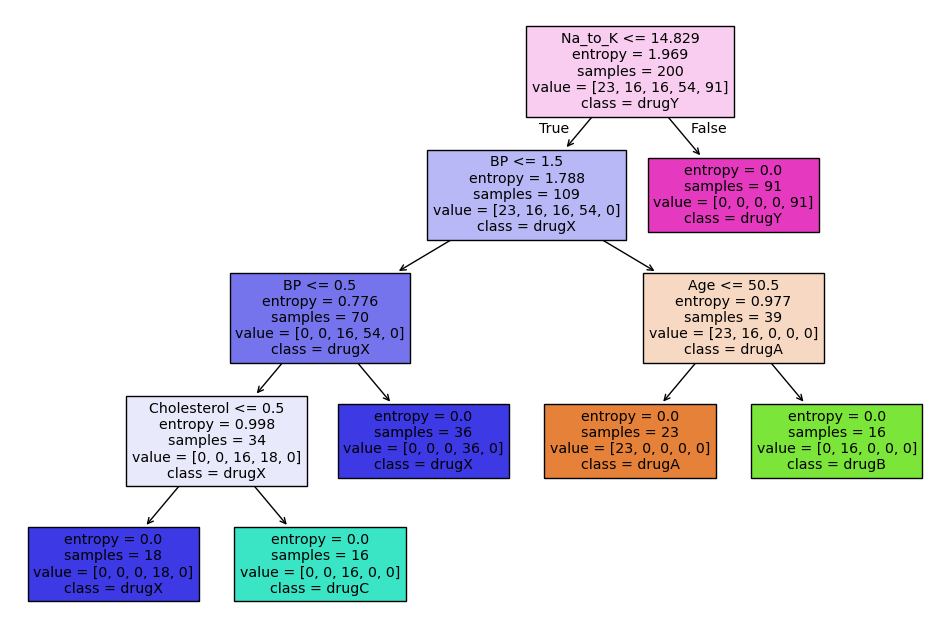

In [56]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

DrugTree.fit(X, y)
plt.figure(figsize=(12, 8))
plot_tree(DrugTree, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], class_names=['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], filled=True)
plt.show()

#### Different Decision Tree Criteria ####

In [54]:
criteria = ['gini', 'entropy', 'log_loss']
for criterion in criteria:
    DrugTree = DecisionTreeClassifier(criterion = criterion, max_depth = 4)
    cross_val_scores = cross_val_score(DrugTree, X, y, cv=10)
    print(f"Cross-Validation Accuracy with {criterion}: {np.mean(cross_val_scores):.2f}")

Cross-Validation Accuracy with gini: 0.99
Cross-Validation Accuracy with entropy: 0.99
Cross-Validation Accuracy with log_loss: 0.99


#### different Decision Tree max_depth values ####

In [55]:
max_depth_values = [None, 3, 5]
for max_depth in max_depth_values:
    DrugTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    cross_val_scores = cross_val_score(DrugTree, X, y, cv = 10)
    print(f"Cross-Validation Accuracy with max_depth={max_depth}: {np.mean(cross_val_scores):.2f}")

Cross-Validation Accuracy with max_depth=None: 0.99
Cross-Validation Accuracy with max_depth=3: 0.89
Cross-Validation Accuracy with max_depth=5: 0.99
